In [5]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/gender_power/booknlp_output/'

Mounted at /content/drive/


In [98]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [99]:
import json
import os
import pandas as pd

import multidict as multidict
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

In [127]:
wordnet_lemmatizer.lemmatize('pairs', 'n')

'pair'

# Agency analysis


**most of the rape scenes**

In [128]:
def gender_analysis(translation, mode='agent'):

  fullTermsDict_she = multidict.MultiDict()
  fullTermsDict_he = multidict.MultiDict()

  tmpDict_she = {}
  tmpDict_he = {}

  wordnet_lemmatizer = WordNetLemmatizer()

  for story_name in os.listdir(translation):
      if story_name == 'full_text' or story_name == 'medea' or story_name.endswith('.csv'):
          continue

      curr_dir = translation + '/' + story_name
      
      # Read in the character info
      with open(curr_dir + '/' + story_name + '_char_info.json') as f:
          char_to_info = json.load(f)

      # Counts agent words for each gender
      for char_name in char_to_info.keys():

        if mode == 'agent':
          w_mode = 'v'
        elif mode == 'poss':
          w_mode = 'n'
        else:
          w_mode = 'a'

        if char_to_info[char_name]['gender'] == 'she/her': # she/her, he/him/his, they/theirs
          agent_words = char_to_info[char_name][mode]
          
          # Lemmatize verbs and adjectives
          for word_info in agent_words:
            word = word_info['w']
            word = wordnet_lemmatizer.lemmatize(word, w_mode)
            word_freq = word_info['i']

            val = tmpDict_she.get(word, 0)
            tmpDict_she[word] = val + word_freq

        elif char_to_info[char_name]['gender'] == 'he/him/his': # she/her, he/him/his, they/theirs
          agent_words = char_to_info[char_name][mode]
          
          for word_info in agent_words:
            word = word_info['w']
            word = wordnet_lemmatizer.lemmatize(word, w_mode)
            word_freq = word_info['i']

            val = tmpDict_he.get(word, 0)
            tmpDict_he[word] = val + word_freq
        else:
          continue

  for key in tmpDict_she:
    fullTermsDict_she.add(key, tmpDict_she[key])
  
  for key in tmpDict_he:
    fullTermsDict_he.add(key, tmpDict_he[key])

  return fullTermsDict_he, fullTermsDict_she 

## Kline translation

In [129]:
agent_words_male,agent_words_female = gender_analysis('Kline_translation')

In [130]:
agent_words_male.keys()

_KeysView('circle', 'search', 'round', 'go', 'see', 'observe', 'assume', 'change', 'mingle', 'call', 'pursue', 'burn', 'follow', 'crown', 'bend', 'hit', 'wind', 'speak', 'land', 'take', 'dispel', 'transfix', 'wound', 'love', 'fail', 'desire', 'felt', 'clasp', 'kiss', 'say', 'yield', 'prevent', 'sigh', 'gaze', 'praise', 'imagine', 'beg', 'ask', 'slow', 'waste', 'run', 'think', 'have', 'drive', 'empty', 'use', 'found', 'conquer', 'do', 'leave', 'draw', 'check', 'relinquish', 'move', 'return', 'saw', 'contain', 'urge', 'turn', 'plunge', 'whip', 'mate', 'delight', 'undo', 'strike', 'reply', 'wish', 'divide', 'pretend', 'surrender', 'walk', 'dip', 'strip', 'dive', 'lead', 'gleam', 'escape', 'soften', 'penetrate', 'reach', 'know', 'try', 'stretch', 'grant', 'hear', 'laugh', 'embrace', 'make', 'disguise', 'restrain', 'remove', 'set', 'circuit', 'examine', 'inspect', 'restore', 'give', 'come', 'stop', 'hunt', 'find', 'pen', 'shrink', 'show', 'lie', 'throw', 'plead', 'hide', 'explain', 'stand',

In [131]:
def word_cloud(text):

    wc = WordCloud(background_color="white", max_words=50)
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

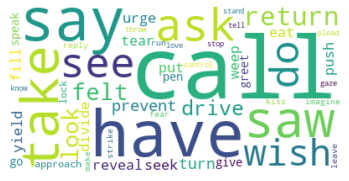

In [136]:
word_cloud(agent_words_male)

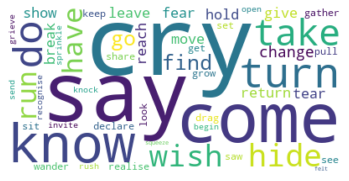

In [137]:
word_cloud(agent_words_female)

## More translation

In [138]:
more_agent_words_male,more_agent_words_female = gender_analysis('More_translation')

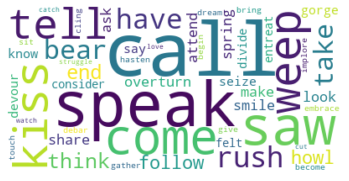

In [141]:
word_cloud(more_agent_words_male)

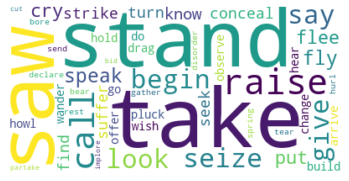

In [142]:
word_cloud(more_agent_words_female)

# Possess/modifier analysis

## Kline translation

In [158]:
poss_words_male,poss_words_female = gender_analysis('Kline_translation', mode='poss')
mod_words_male,mod_words_female = gender_analysis('Kline_translation', mode='mod')›

In [159]:
poss_words_female.keys()

_KeysView('head', 'tress', 'beauty', 'name', 'look', 'body', 'effort', 'toe', 'knee', 'clothes', 'arm', 'back', 'foot', 'fear', 'hair', 'track', 'limb', 'goddess', 'weapon', 'bow', 'quiver', 'way', 'heel', 'shoulder', 'neck', 'strength', 'flight', 'prayer', 'breast', 'face', 'heart', 'father', 'eye', 'lip', 'wrist', 'hand', 'bare', 'enemy', 'leg', 'wish', 'loveliness', 'branch', 'crown', 'uncle', 'daughter', 'gift', 'loss', 'anger', 'mother', 'husband', 'mind', 'son', 'will', 'Proserpine', 'gown', 'basket', 'companion', 'picking', 'dress', 'tunic', 'tear', 'chariot', 'birth', 'mouth', 'friend', 'ribbon', 'waist', 'side', 'fountain', 'bone', 'nail', 'finger', 'ankle', 'vein', 'child', 'greedy', 'delight', 'love', 'garment', 'coil', 'sister', 'idleness', 'appearance', 'expression', 'brightness', 'word', 'power', 'throat', 'feeling', 'misery', 'home', 'kiss', 'step', 'arrow', 'fertility', 'shame', 'chest', 'band', 'call', 'blushing', 'guilt', 'Jupiter', 'forehead', 'brother', 'punishment'

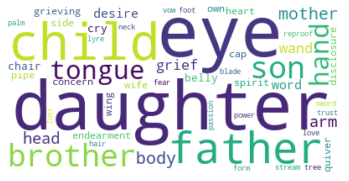

In [156]:
word_cloud(poss_words_male)

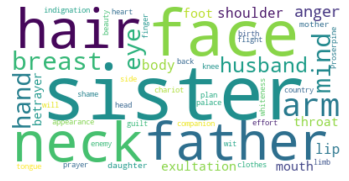

In [155]:
word_cloud(poss_words_female)

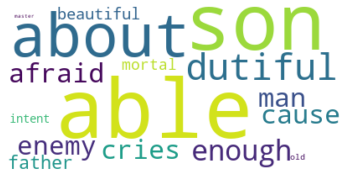

In [160]:
word_cloud(mod_words_male)

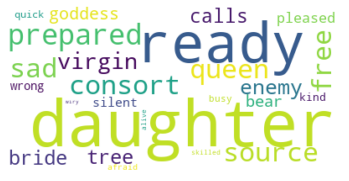

In [161]:
word_cloud(mod_words_female)

## More translation

In [162]:
more_poss_words_male,more_poss_words_female = gender_analysis('More_translation', mode='poss')
more_mod_words_male,more_mod_words_female = gender_analysis('More_translation', mode='mod')

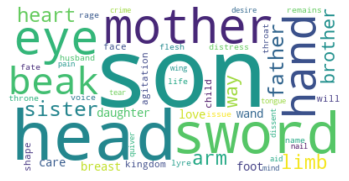

In [163]:
word_cloud(more_poss_words_male)

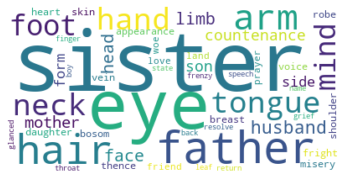

In [167]:
word_cloud(more_poss_words_female)

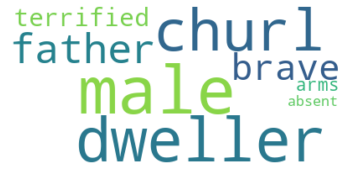

In [165]:
word_cloud(more_mod_words_male)

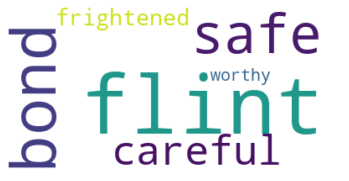

In [166]:
word_cloud(more_mod_words_female)

# Medea analysis

medea -> women in power -> analysis point